In [13]:
#Loading Iris dataset
from sklearn.datasets import load_iris
import pandas as pd

data = load_iris()
df = pd.DataFrame(data.data,columns=data.feature_names)
df['target'] = data.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , classification_report
import matplotlib.pyplot as plt


x = df.drop('target',axis=1)
y = df['target']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 42)

dt = DecisionTreeClassifier(criterion='gini', max_depth=3)
dt.fit(x_train,y_train)

y_pred_dt = dt.predict(x_test)

print("Decision Tree Accuracy : ",accuracy_score(y_test,y_pred_dt))
print(classification_report(y_test,y_pred_dt))

Decision Tree Accuracy :  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



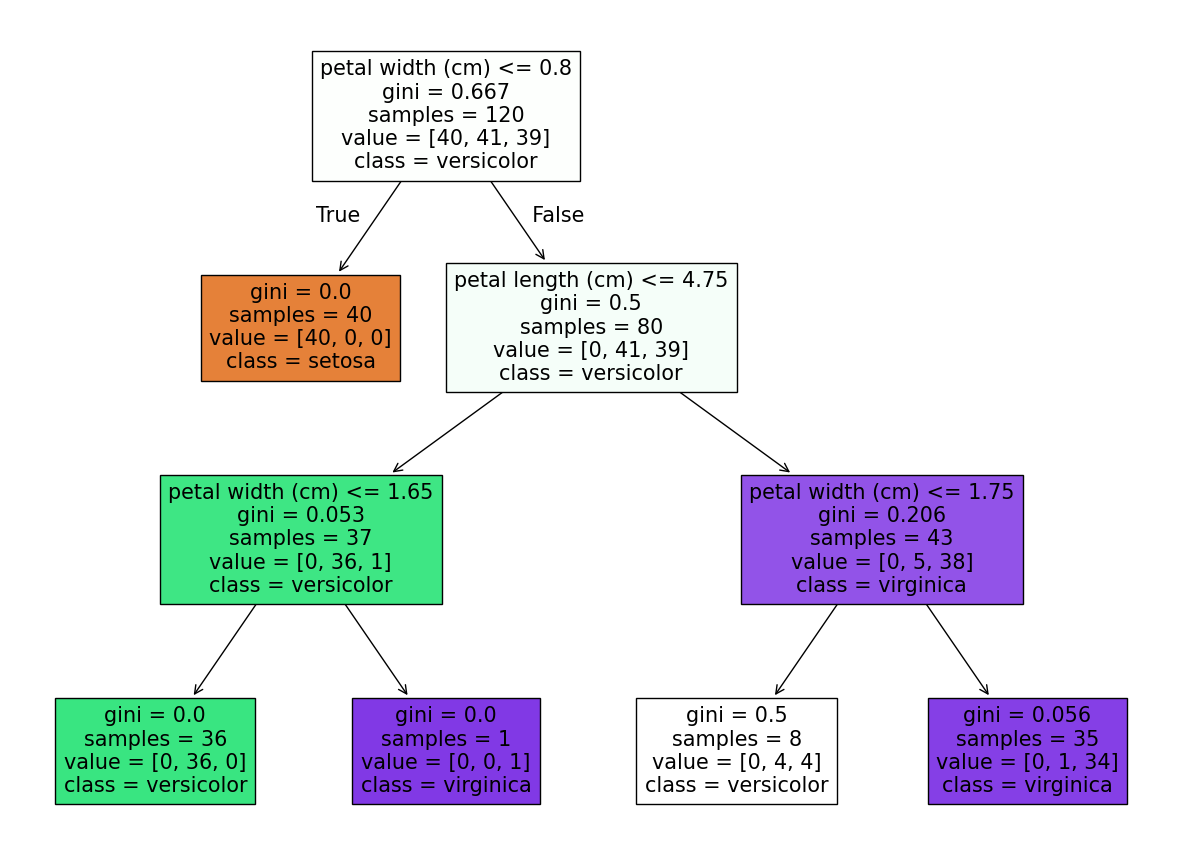

In [10]:
#Visualize the decision tree 
plt.figure(figsize=(15,11))
plot_tree(dt,filled=True,feature_names=data.feature_names,class_names=data.target_names)
plt.show()

In [16]:
#Random Forest 
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(x_train,y_train)

y_pred_rf=rf.predict(x_test)

print("Random Forest Accuracy: " ,accuracy_score(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))

Random Forest Accuracy:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [17]:
print("DT Accuracy:", accuracy_score(y_test, y_pred_dt))
print("RF Accuracy:", accuracy_score(y_test, y_pred_rf))

DT Accuracy: 1.0
RF Accuracy: 1.0


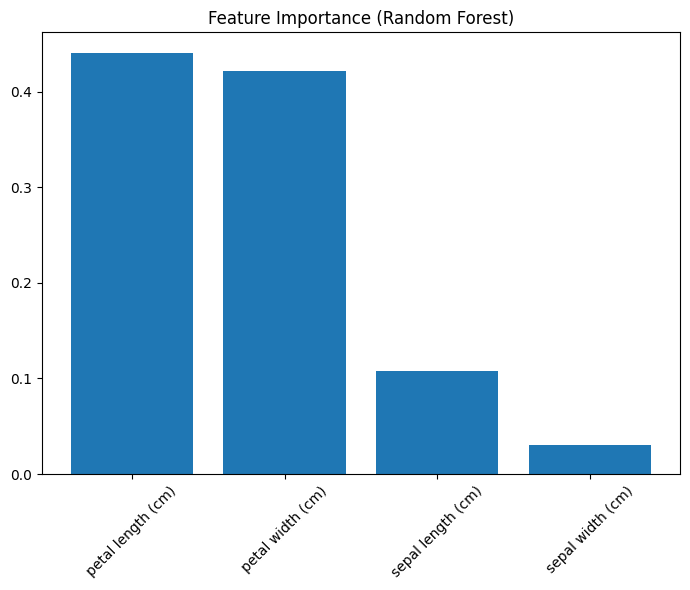

In [20]:
#Data set is pure and small so we are getting 100 % accuracy in both the models
#Plotfeature importance-randomforest
import numpy as np

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(7,6))
plt.title("Feature Importance (Random Forest)")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=45)
plt.tight_layout()
plt.show()
